In [1]:
#Importing liabraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("tipsdatasets.csv")

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# Visualization

In [10]:
#Box plot

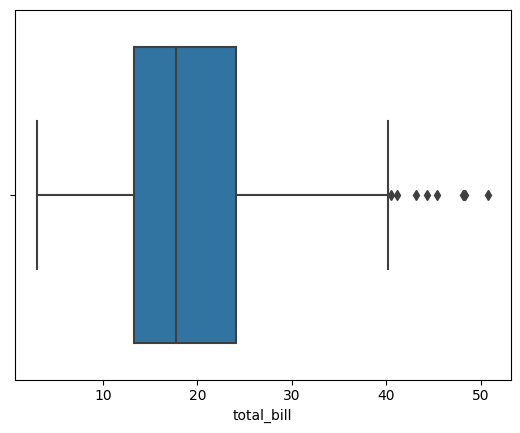

In [11]:
ax=sns.boxplot(x=df["total_bill"])

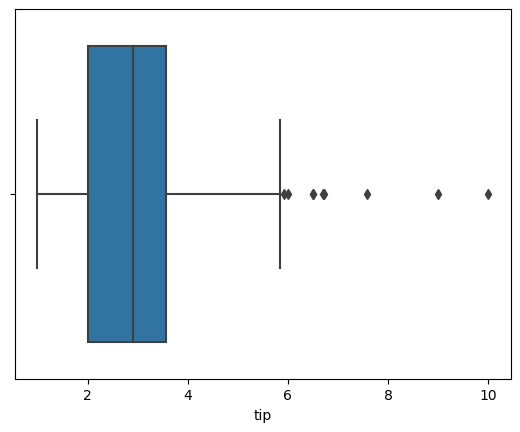

In [12]:
ax=sns.boxplot(x=df["tip"])

array([[<AxesSubplot: title={'center': 'total_bill'}>,
        <AxesSubplot: title={'center': 'tip'}>],
       [<AxesSubplot: title={'center': 'size'}>, <AxesSubplot: >]],
      dtype=object)

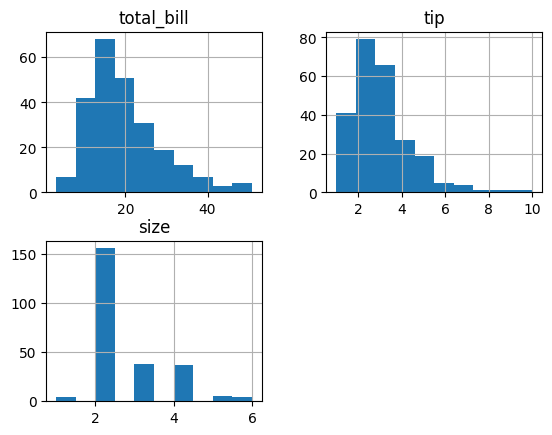

In [13]:
df.hist()

<AxesSubplot: ylabel='sex'>

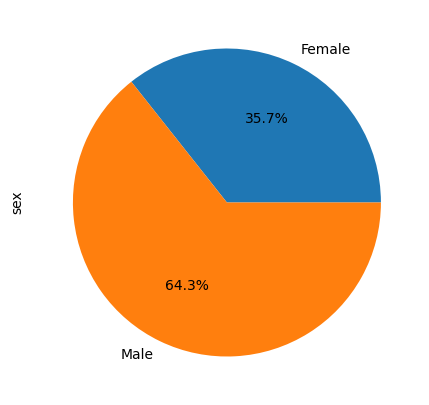

In [14]:
df.groupby("sex")["sex"].count().plot.pie(figsize=(5,5),autopct="%1.1f%%")

<AxesSubplot: ylabel='smoker'>

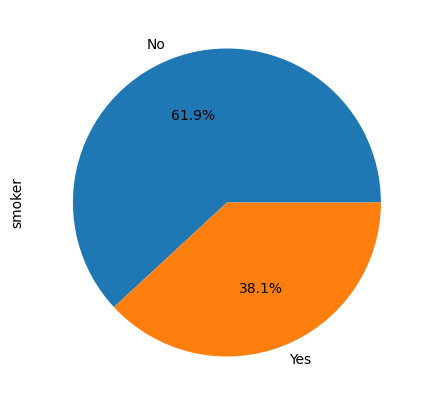

In [16]:
df.groupby("smoker")["smoker"].count().plot.pie(figsize=(5,5),autopct="%1.1f%%")

<AxesSubplot: ylabel='day'>

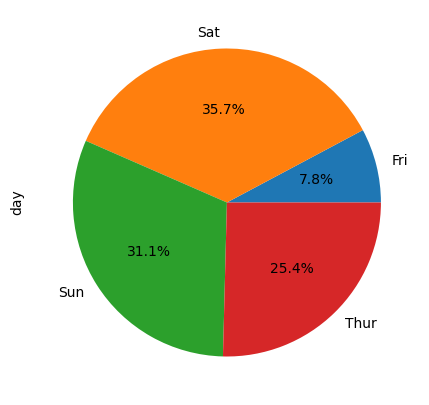

In [17]:
df.groupby("day")["day"].count().plot.pie(figsize=(5,5),autopct="%1.1f%%")

<AxesSubplot: ylabel='size'>

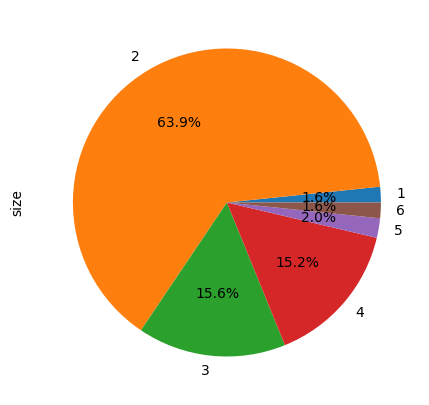

In [18]:
df.groupby("size")["size"].count().plot.pie(figsize=(5,5),autopct="%1.1f%%")

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

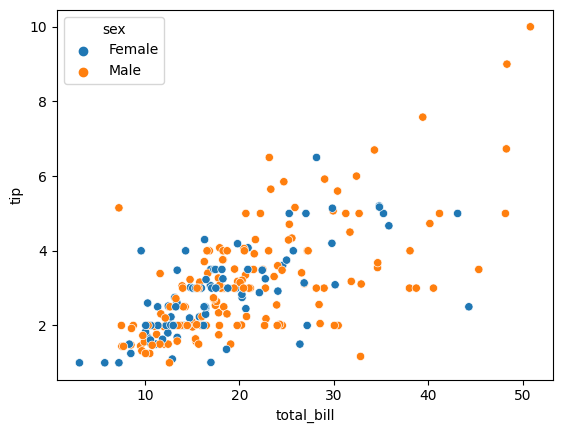

In [19]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="sex")

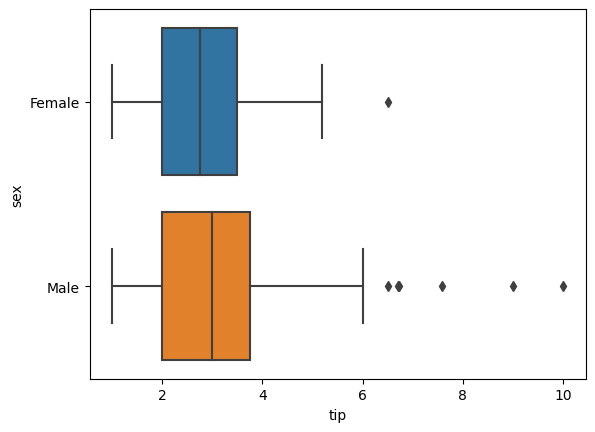

In [20]:
ax=sns.boxplot(x=df["tip"],y=df["sex"])

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

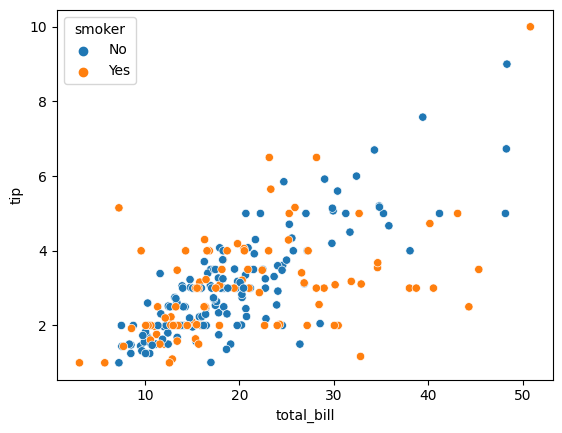

In [21]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="smoker")

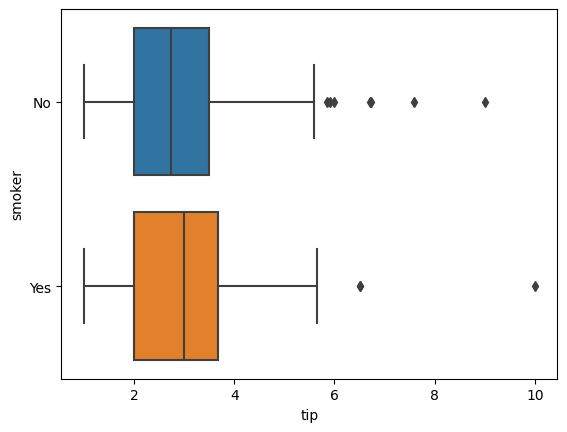

In [22]:
ax=sns.boxplot(x=df["tip"],y=df["smoker"])

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

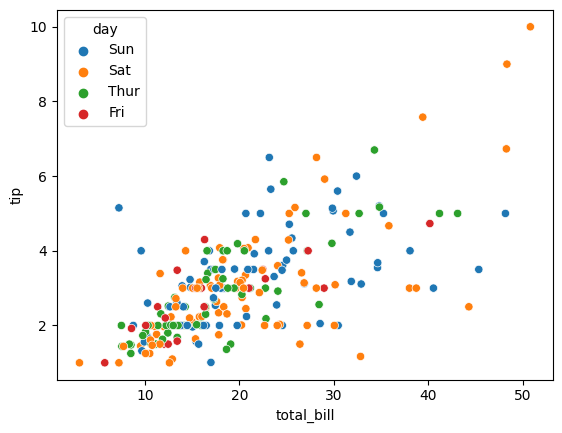

In [23]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="day")

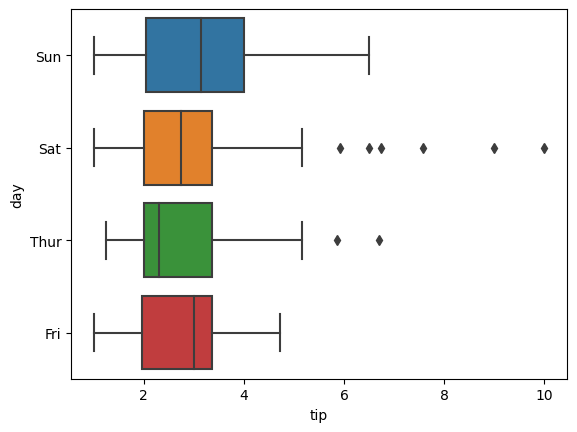

In [24]:
ax=sns.boxplot(x=df["tip"],y=df["day"])

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

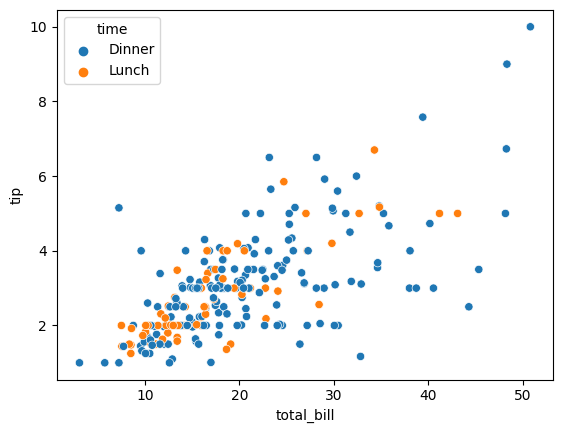

In [25]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="time")

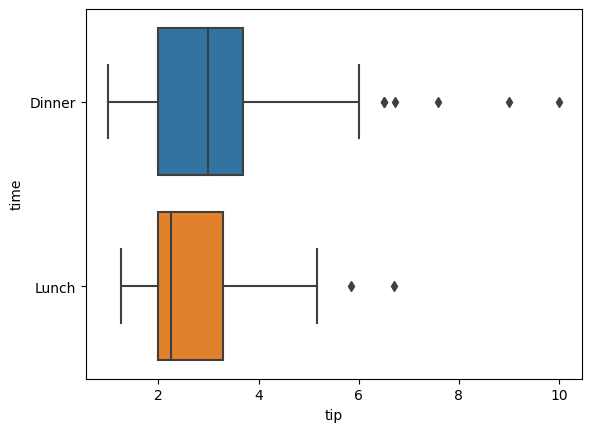

In [26]:
ax=sns.boxplot(x=df["tip"],y=df["time"])

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

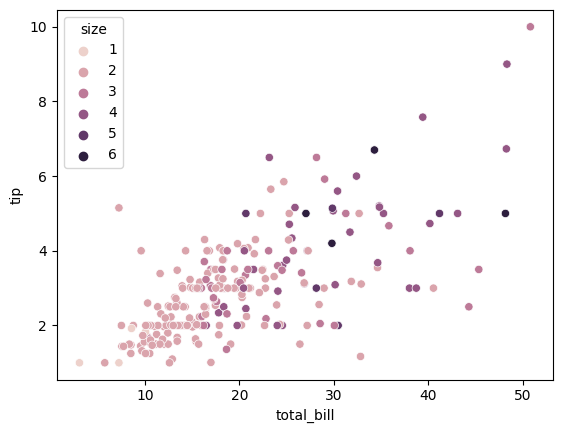

In [27]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="size")

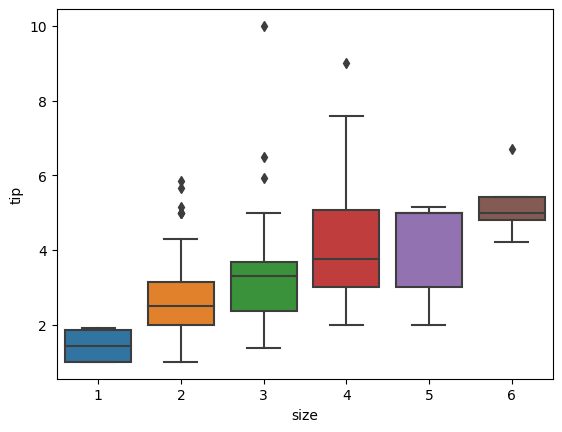

In [28]:
ax=sns.boxplot(y=df["tip"],x=df["size"])

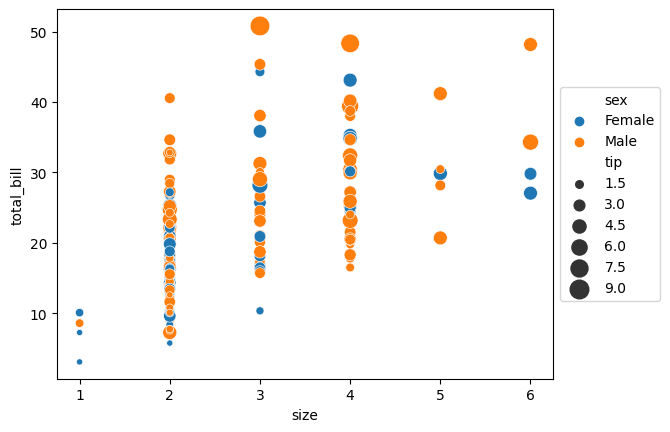

In [31]:
g=sns.scatterplot(data=df,y="total_bill",x="size",hue="sex",size="tip",sizes=(20,200))
g.legend(loc="center left",bbox_to_anchor=(1,0.5),ncol=1)

# Feature Engineering

In [32]:
#convert categorical variables into numerical variables

In [33]:
df=pd.get_dummies(df)

In [34]:
#correlation heatmap

<AxesSubplot: >

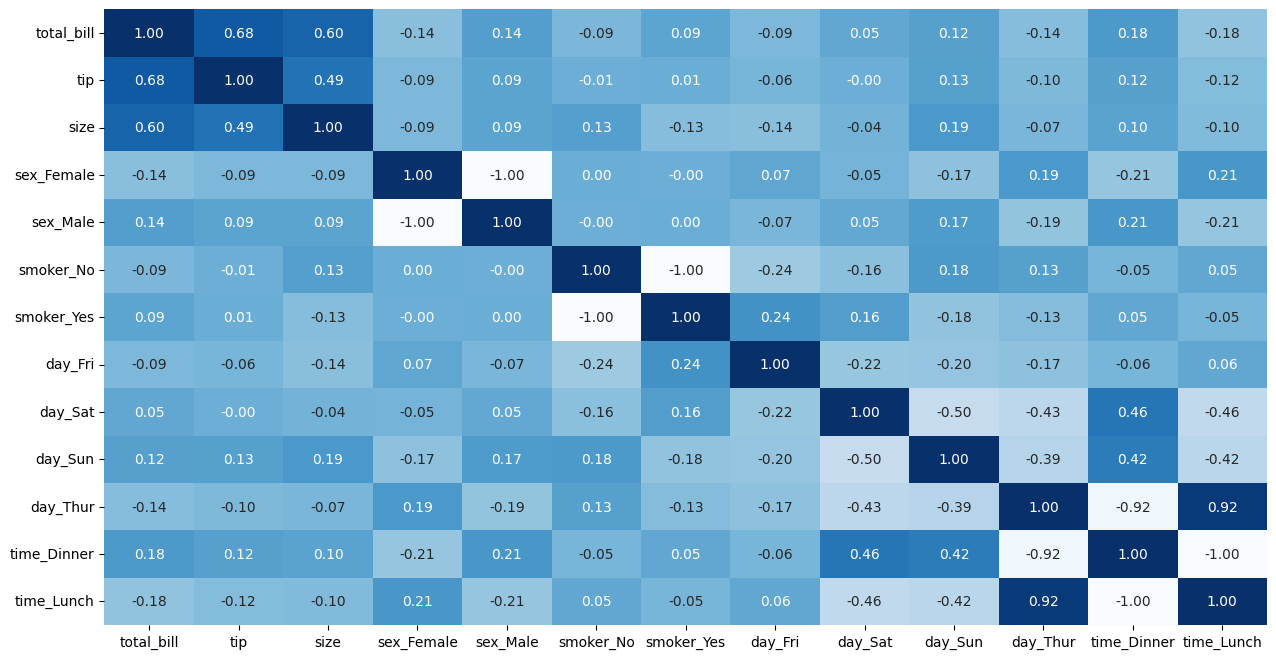

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap="Blues",fmt=".2f")

In [36]:
#Normalize total bill and tip by using log

In [37]:
df["total_bill"]=np.log(df["total_bill"])
df["tip"]=np.log(df["tip"])

In [38]:
x=df.drop("tip",axis=1)
y=df["tip"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
#implement standardization by using pipelines

In [44]:
pipelines=[]
pipelines.append(("ScaledLR",Pipeline([("scaler",StandardScaler()),("LR",LinearRegression())])))

In [45]:
pipelines.append(("ScaledLASSO",Pipeline([("scaler",StandardScaler()),("LASSO",Lasso())])))


In [46]:
pipelines.append(("ScaledEN",Pipeline([("scaler",StandardScaler()),("EN",ElasticNet())])))

In [47]:
pipelines.append(("ScaledKNN",Pipeline([("scaler",StandardScaler()),("KNN",KNeighborsRegressor())])))

In [51]:
pipelines.append(("ScaledCART",Pipeline([("scaler",StandardScaler()),("CART",DecisionTreeRegressor())])))

In [53]:
pipelines.append(("ScaledGBM",Pipeline([("scaler",StandardScaler()),("GBM",GradientBoostingRegressor())])))

In [54]:
results=[]
names=[]

In [55]:
for name,model in pipelines:
    kfold=KFold(n_splits=10,random_state=21,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

ScaledLR:-0.114422 (0.048107)
ScaledLASSO:-0.191945 (0.043389)
ScaledEN:-0.191945 (0.043389)
ScaledKNN:-0.144916 (0.048902)
ScaledCART:-0.230305 (0.092880)
ScaledGBM:-0.147063 (0.067833)


In [56]:
from sklearn.model_selection import GridSearchCV


In [58]:
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict(n_estimators=np.array([50,100,200,300,400]))
model=GradientBoostingRegressor(random_state=21)
kfold=KFold(n_splits=10,random_state=21,shuffle=True)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring="neg_mean_squared_error",cv=kfold)
grid_result=grid.fit(rescaledx,y_train)

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))
    
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

-0.134403 (0.062295) with: {'n_estimators': 50}
-0.146312 (0.066722) with: {'n_estimators': 100}
-0.165013 (0.073694) with: {'n_estimators': 200}
-0.179858 (0.078163) with: {'n_estimators': 300}
-0.188313 (0.080229) with: {'n_estimators': 400}
Best: -0.134403 using {'n_estimators': 50}


In [59]:
#standardize the training and testing data before put them into the model.

In [60]:
from sklearn.metrics import mean_squared_error

scaler=StandardScaler().fit(x_train)
rescaled_x_train=scaler.transform(x_train)
model=GradientBoostingRegressor(random_state=21,n_estimators=50)
model.fit(rescaled_x_train,y_train)

rescaled_x_test=scaler.transform(x_test)
predictions=model.predict(rescaled_x_test)
print(mean_squared_error(y_test,predictions))

0.0924233559971579


In [61]:
compare=pd.DataFrame({"predictions":predictions,"test_data":y_test})
compare.head()

,predictions,test_data
24,1.039420,1.156881
6,0.667572,0.693147
153,1.310345,0.693147
211,1.215938,1.640937
198,0.663103,0.693147


In [62]:
actual_y_test=np.exp(y_test)
actual_predicted=np.exp(predictions)
diff=abs(actual_y_test-actual_predicted)

compare_actual=pd.DataFrame({"test data":actual_y_test,"predicted price":actual_predicted,"Difference":diff})
compare_actual=compare_actual.astype(float)
compare_actual.head(10)

,test data,predicted price,Difference
24,3.18,2.827577,0.352423
6,2.00,1.949498,0.050502
153,2.00,3.707454,1.707454
211,5.16,3.373458,1.786542
198,2.00,1.940805,0.059195
176,2.00,3.222516,1.222516
192,2.56,3.480226,0.920226
124,2.52,1.891785,0.628215
9,3.23,2.275493,0.954507
101,3.00,2.592942,0.407058
